In [1]:
# increase cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Inspiration for code:

- https://developers.google.com/machine-learning/guides/text-classification/
- https://github.com/google/eng-edu/blob/master/ml/guides/text_classification/load_data.py

In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import random
import time
import pickle
import gc
import re

import numpy as np
import pandas as pd

from importlib import reload

import scipy.sparse

In [3]:
from helpers import load_data
from helpers import explore_data
from helpers import preprocess_data
from helpers import train_model

/home/yulia/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [ ]:
# import tensorflow as tf
# tf.__version__

## Load train, validate, test

In [4]:
main_dir = '/home/yulia/'

In [18]:
outdata_path = main_dir+'final-project/Classification/data'

In [19]:
with open(os.path.join(outdata_path, 'train_list'), 'rb') as fp:
    train = pickle.load(fp)
with open(os.path.join(outdata_path, 'train_ids'), 'rb') as fp:
    train_ids = pickle.load(fp)
with open(os.path.join(outdata_path, 'train_target'), 'rb') as fp:
    train_target = pickle.load(fp)

In [20]:
sum(train_target)

94074

In [21]:
with open(os.path.join(outdata_path, 'val_list'), 'rb') as fp:
    val = pickle.load(fp)
with open(os.path.join(outdata_path, 'val_ids'), 'rb') as fp:
    val_ids = pickle.load(fp)
with open(os.path.join(outdata_path, 'val_target'), 'rb') as fp:
    val_target = pickle.load(fp)

In [22]:
sum(val_target)

31358

In [12]:
with open(os.path.join(outdata_path, 'test_list'), 'rb') as fp:
    test = pickle.load(fp)
with open(os.path.join(outdata_path, 'test_ids'), 'rb') as fp:
    test_ids = pickle.load(fp)
with open(os.path.join(outdata_path, 'test_target'), 'rb') as fp:
    test_target = pickle.load(fp)

In [13]:
sum(test_target)

31358

In [14]:
token_path = '/home/yulia/final-project/Classification/data/tokenized'

In [15]:
train_vec = np.load(os.path.join(token_path, 'train_vec.npy'))
val_vec = np.load(os.path.join(token_path, 'val_vec.npy'))
test_vec = np.load(os.path.join(token_path, 'test_vec.npy'))

In [20]:
word_index = pickle.load(open(os.path.join(token_path, 'word_index.p'), 'rb'))

## CNN Models

In [21]:
logs_base_dir = main_dir + 'final-project/Classification/logs'

In [22]:
cnn_model_params = {
    'model': 'cnn',
    'word_index': word_index,
    'learning_rate': 0.001,
    'layers': 2,
    'epochs': 1000,
    'batch_size': 128,
    'filters': 64,
    'dropout_rate': 0.2,
    'embedding_dim': 200,
    'kernel_size': 5,
    'pool_size': 1,
    'max_num_words': 20000,
    'use_pretrained_embedding': True,
    'is_embedding_trainable': True,
    'glove_dir': main_dir + 'final-project/data'
}

In [23]:
reload(train_model)
history, train_pred_probs, val_pred_probs = train_model.train_model(((train_vec, train_target), (val_vec, val_target)), logs_base_dir, **cnn_model_params)

Found 400000 word vectors.
It took 25.7 seconds
Preparing embedding matrix.
20000 20000
Embedding matrix has been built.
Its shape is (20000, 200).
It took 0.0 seconds
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 188148 samples, validate on 62716 samples
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Epoch 1/1000
 - 1164s - loss: 0.6026 - acc: 0.6718 - val_loss: 0.5638 - val_acc: 0.7077
Epoch 2/1000
 - 1149s - loss: 0.5469 - acc: 0.7222 - val_loss: 0.5427 - val_acc: 0.7289
Epoch 3/1000
 - 1148s - loss: 0.5222 - acc: 0.7403 - val_loss: 0.5340 - val_acc: 0.7325
Epoch 4/1000
 - 1148s - loss: 0.5023 - acc: 0.7546 - val_loss: 0.5270 - val_acc: 0.7357
Epoch 5/1000
 - 1147s - loss: 0.4842 - acc: 0.7666 - val_loss: 0.5260 - val_acc: 0.7378
Epoch 6/1000
 - 1146s - loss

### Clean up space/save outputs

In [5]:
probs_path = main_dir + 'final-project/Classification/data/cnn/gender'

In [27]:
with open(os.path.join(probs_path, 'val_pred_probs2'), 'wb') as fp:
    pickle.dump(val_pred_probs, fp)

In [ ]:
with open(os.path.join(probs_path, 'val_pred_probs2'), 'rb') as fp:
    val_pred_probs = pickle.load(fp)

## Model Evaluation

In [47]:
val_preds = val_pred_probs > 0.5
np.mean(val_preds.flatten()==val_target)

0.7371165252886026

In [48]:
val_preds.shape, len(val_target)

((62716, 1), 62716)

Confusion matrix, without normalization
[[23939  7419]
 [ 9068 22290]]
             precision    recall  f1-score   support

       Male       0.73      0.76      0.74     31358
     Female       0.75      0.71      0.73     31358

avg / total       0.74      0.74      0.74     62716



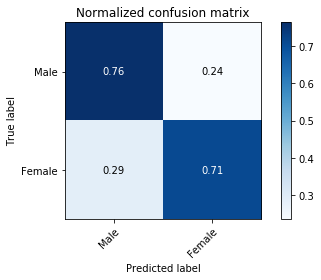

In [49]:
reload(explore_data)
# specify class names in 0 - 1 order
classes = ['Male', 'Female']
explore_data.plot_confusion_matrix(val_target, val_preds, classes, normalize=True)

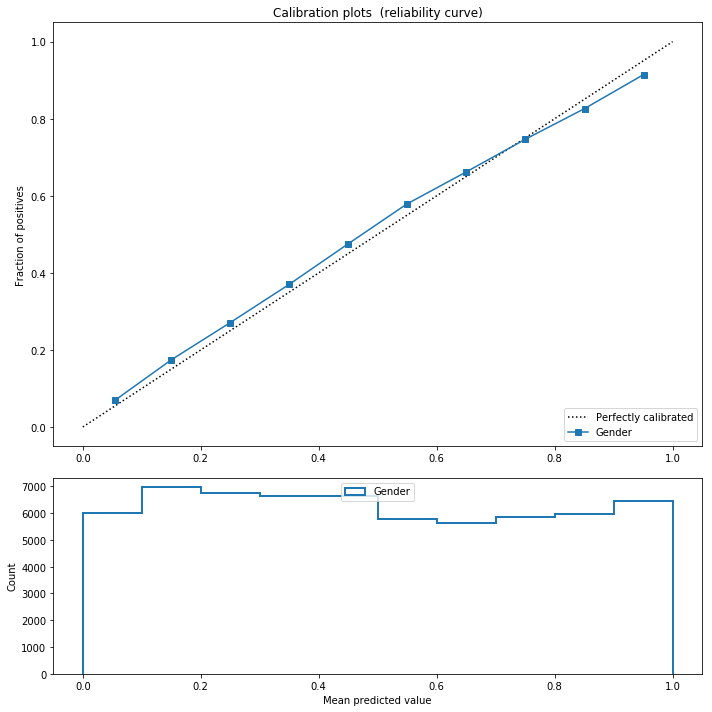

In [51]:
reload(explore_data)
explore_data.plot_calibration_curve(val_target, val_pred_probs, 'Gender')

In [52]:
descr_df = pd.read_csv('/home/yulia/final-project/data/QA/full_descr.txt', sep="|", index_col=0)
descr_df = descr_df.loc[np.asarray(val_ids, dtype=int)]
descr_df.shape

/home/yulia/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


(62716, 16)

In [53]:
reload(explore_data)
# checking the ratios of demo variables in low-mid-high probability buckets
explore_data.check_bin_probs_distr(val_pred_probs, 
                                   val_ids, 
                                   descr_df)

Validation sample means:
      Gender_F  Ethinicity_NW     AvgAge   Party_D  Chamber_H  AvgWordCount
base       0.5       0.173991  58.285477  0.621468   0.659816     387.29868


,Gender_F,Ethinicity_NW,AvgAge,Party_D,Chamber_H,AvgWordCount
0.4,0.45,0.46,0.99,0.83,0.76,0.94
0.6,1.05,0.94,0.99,0.97,1.11,0.89
1.0,1.58,1.63,1.01,1.20,1.21,1.13


In [54]:
reload(explore_data)
explore_data.compare_ngrams(val, val_pred_probs, ngram_range=(1, 2))


Top 10 ngrams by differentiating score:
rise 	 1796.7
mr president 	 1320.3
speaker rise 	 1309.2
women 	 1066.0
rise today 	 905.7
our 	 783.5
colleagues to 	 776.7
their 	 714.1
families 	 704.0
speaker 	 695.4


bin,1,2,3
colleagues to,2502.0,1795.0,5665.0
families,2996.0,2370.0,10543.0
mr president,17035.0,3308.0,4932.0
our,41036.0,24253.0,71147.0
rise,4210.0,2971.0,10026.0
rise today,1641.0,1184.0,4355.0
speaker,15025.0,10938.0,24473.0
speaker rise,1496.0,1263.0,4878.0
their,27181.0,15880.0,45061.0
women,1959.0,1786.0,17815.0


In [55]:
reload(explore_data)
explore_data.print_mispredictions(val_target, val_pred_probs, val, val_ids, descr_df)


True positive (Predicted prob: 0.92):

date               19980324
char_count             1057
word_count              181
speakerid       1.05121e+08
Party                     D
Congress                105
Chamber                   H
State                    CA
Ethnicity                 W
Age                      58
Age_lt_med                0
NonWhite                  0
Female                    1
speaker          Ms. PELOSI
Full Name     PELOSI, NANCY
match                 exact
Name: 1050119748, dtype: object

 Mr. Speaker. sadly I rise to call to the attention of my colleagues the passing of a good friend of working people in America. Jimmy Herman. Jimmy Herman is one of the most respected and beloved labor leaders in .San Francisco history. and he died on Friday. He was the president emeritus of the International Longshoremens and Warehousemens Union. Jimmy was known for his enormous compassion. commitment to workers rights and social justice. His life was truly about justice. H

## CNN - chunking the data

### Prepare the data

In [23]:
chunk_len=50

In [25]:
reload(preprocess_data)
train_chunk, train_ids_chunk, train_target_chunk = preprocess_data.split_speech_to_chunks(train, train_ids, train_target, max_len=chunk_len)
val_chunk, val_ids_chunk, val_target_chunk = preprocess_data.split_speech_to_chunks(val, val_ids, val_target, max_len=chunk_len)

Original data has 188148 speeches
It was split into 1561543 chunks
Checks on ids and target 1561543 1561543
Original target mean 0.5
New target mean 0.5147050065223948
Original data has 62716 speeches
It was split into 515514 chunks
Checks on ids and target 515514 515514
Original target mean 0.5
New target mean 0.5173845909131469


In [31]:
# Limit on the number of features. 
TOP_K = 20000

# Limit on the length of text sequences. Sequences longer than this
# will be truncated.
# MAX_SEQUENCE_LENGTH = 100
MAX_SEQUENCE_LENGTH = chunk_len

vec_params = {
    'num_words': TOP_K,
    'max_seq_length': MAX_SEQUENCE_LENGTH
}

In [32]:
start_time = time.time()
train_vec, val_vec, test_vec, word_index = preprocess_data.sequence_vectorize(train_chunk, val_chunk, test_chunk, **vec_params)
print("\nIt took {:.1f} seconds to tokenize the data".format(time.time()-start_time))


It took 204.4 seconds to tokenize the data


In [68]:
token_path = '/home/yulia/final-project/Classification/data/tokenized'

In [70]:
np.save(os.path.join(token_path, 'train_vec_chunk'), train_vec)
np.save(os.path.join(token_path, 'val_vec_chunk'), val_vec)
np.save(os.path.join(token_path, 'test_vec_chunk'), test_vec)

In [ ]:
train_vec = np.load(os.path.join(token_path, 'train_vec_chunk.npy'))
val_vec = np.load(os.path.join(token_path, 'val_vec_chunk.npy'))
test_vec = np.load(os.path.join(token_path, 'test_vec_chunk.npy'))

In [83]:
train_vec.shape

(1561543, 50)

In [84]:
train_vec[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,  306,   55,   14,
          9,   32, 1812,    3,  253,  194,  681,    3,    2,  429, 5085,
         24,  278, 2259, 2766, 2484,    7,  222,    4,    2,   89,   15,
        402,    5,    7,  222,   22,    7,  247,  313,    4, 5086,   11,
         63,    1, 1366,  343,    2,  161], dtype=int32)

In [85]:
type(train_vec)

numpy.ndarray

### Run the model

In [33]:
history_chunk, train_pred_probs_chunk, val_pred_probs_chunk = train_model.train_model(((train_vec, train_target_chunk), (val_vec, val_target_chunk)), logs_base_dir, **cnn_model_params)

Found 400000 word vectors.
It took 22.2 seconds
Preparing embedding matrix.
20000 20000
Embedding matrix has been built.
Its shape is (20000, 200).
It took 0.0 seconds
Train on 1561543 samples, validate on 515514 samples
Epoch 1/1000
 - 787s - loss: 0.6190 - acc: 0.6540 - val_loss: 0.6120 - val_acc: 0.6626
Epoch 2/1000
 - 786s - loss: 0.5976 - acc: 0.6769 - val_loss: 0.6073 - val_acc: 0.6683
Epoch 3/1000
 - 785s - loss: 0.5878 - acc: 0.6857 - val_loss: 0.6048 - val_acc: 0.6712
Epoch 4/1000
 - 786s - loss: 0.5787 - acc: 0.6936 - val_loss: 0.6046 - val_acc: 0.6715
Epoch 5/1000
 - 786s - loss: 0.5694 - acc: 0.7020 - val_loss: 0.6038 - val_acc: 0.6718
Epoch 6/1000
 - 787s - loss: 0.5600 - acc: 0.7090 - val_loss: 0.6058 - val_acc: 0.6718
Epoch 7/1000
 - 785s - loss: 0.5507 - acc: 0.7161 - val_loss: 0.6071 - val_acc: 0.6708
Validation accuracy: 0.6707907319068909, loss: 0.6070530459252929


In [34]:
with open(os.path.join(probs_path, 'val_pred_probs_chunk'), 'wb') as fp:
    pickle.dump(val_pred_probs_chunk, fp)

In [27]:
val_preds_chunk = val_pred_probs_chunk > 0.5
np.mean(val_preds_chunk.flatten()==val_target_chunk)

0.6707907059750075

In [28]:
pred_df = pd.DataFrame({'ids': val_ids_chunk, 'target': val_target_chunk, 'probs': val_pred_probs_chunk.flatten(), 'preds': val_preds_chunk.flatten()})
f = {'probs': [min, max, 'mean']}
pred_aggr_df = pred_df.groupby('ids').agg(f).reset_index()
pred_aggr_df.columns = ['ids', 'probs_min', 'probs_max', 'probs_mean']
pred_aggr_df = pred_aggr_df.merge(pred_df[['target', 'ids']].groupby('ids').mean().reset_index(), on='ids')
pred_aggr_df = pred_aggr_df.merge(pred_df[['preds', 'ids']].groupby('ids').mean().reset_index(), on='ids')
pred_aggr_df['preds_probs_mean'] = pred_aggr_df['probs_mean'].apply(lambda x: 1 if x > 0.5 else 0)
pred_aggr_df['preds_mean'] = pred_aggr_df['preds'].apply(lambda x: 1 if x > 0.5 else 0)
pred_aggr_df.head()

,ids,probs_min,probs_max,probs_mean,target,preds,preds_probs_mean,preds_mean
0,1000000344,0.119916,0.719327,0.544768,0,0.75,1,1
1,1000000363,0.035663,0.547337,0.317551,0,0.10,0,0
2,1000000554,0.041156,0.248933,0.145044,0,0.00,0,0
3,1000000582,0.119989,0.456109,0.262303,0,0.00,0,0
4,1000000732,0.143419,0.663259,0.320443,0,0.25,0,0


In [29]:
np.mean(pred_aggr_df.target == pred_aggr_df.preds_probs_mean), np.mean(pred_aggr_df.target == pred_aggr_df.preds_mean)

(0.7448976337776644, 0.7293513616939856)

## Model evaluation

In [30]:
val_preds_chunk = pred_aggr_df.preds_probs_mean
val_pred_probs_aggr_chunk = pred_aggr_df.probs_mean
val_aggr_target = pred_aggr_df.target
val_aggr_ids = pred_aggr_df.ids

In [39]:
with open(os.path.join(probs_path, 'val_pred_probs_aggr_chunk'), 'wb') as fp:
    pickle.dump(list(val_pred_probs_aggr_chunk.values), fp)

Confusion matrix, without normalization
[[22620  8738]
 [ 7261 24097]]
             precision    recall  f1-score   support

       Male       0.76      0.72      0.74     31358
     Female       0.73      0.77      0.75     31358

avg / total       0.75      0.74      0.74     62716



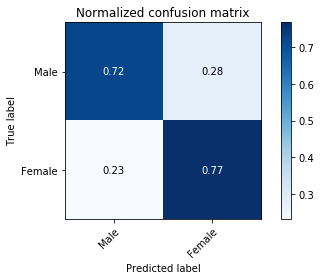

In [32]:
reload(explore_data)
# specify class names in 0 - 1 order
classes = ['Male', 'Female']
explore_data.plot_confusion_matrix(val_aggr_target, val_preds_chunk, classes, normalize=True)

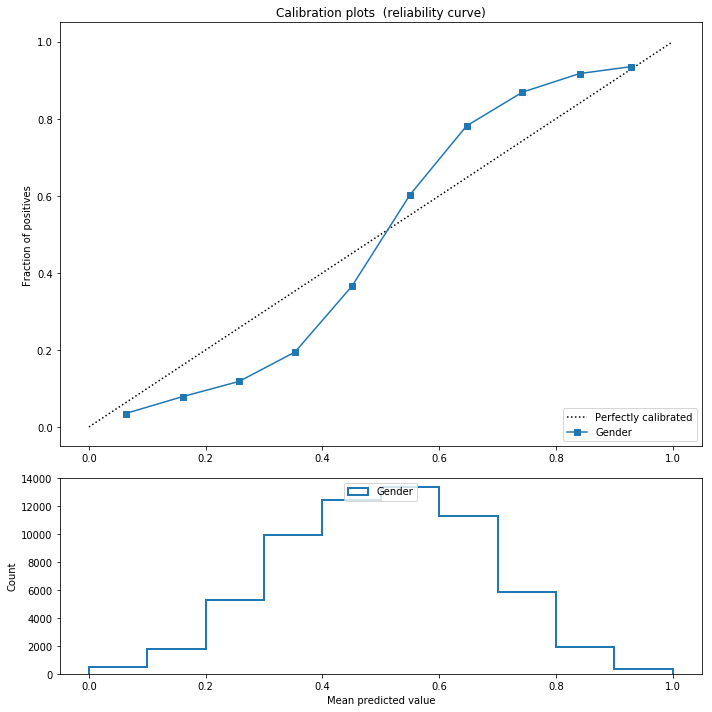

In [63]:
reload(explore_data)
explore_data.plot_calibration_curve(val_aggr_target, val_pred_probs_aggr_chunk, 'Gender')

In [65]:
reload(explore_data)
# checking the ratios of demo variables in low-mid-high probability buckets
explore_data.check_bin_probs_distr(val_pred_probs_aggr_chunk, 
                                   val_aggr_ids, 
                                   descr_df)

Validation sample means:
      Gender_F  Ethinicity_NW     AvgAge   Party_D  Chamber_H  AvgWordCount
base       0.5       0.173991  58.285477  0.621468   0.659816     387.29868


,Gender_F,Ethinicity_NW,AvgAge,Party_D,Chamber_H,AvgWordCount
0.4,0.31,0.34,0.99,0.80,0.66,0.78
0.6,0.98,0.83,0.99,0.95,1.06,1.12
1.0,1.65,1.81,1.02,1.25,1.22,1.03


In [81]:
reload(explore_data)
explore_data.compare_ngrams(val_chunk, val_pred_probs_chunk, ngram_range=(1, 2))


Top 10 ngrams by differentiating score:
women 	 7330.1
mr president 	 5971.0
our 	 5162.0
president 	 4202.8
children 	 4151.9
families 	 3156.8
her 	 2822.3
health 	 2524.0
their 	 2426.8
senate 	 2418.1


bin,1,2,3
children,1693.0,5260.0,16408.0
families,1228.0,3623.0,11058.0
health,3806.0,8155.0,18177.0
her,2045.0,5359.0,17178.0
mr president,15037.0,5642.0,4377.0
our,24478.0,41626.0,70332.0
president,26312.0,16313.0,13079.0
senate,13035.0,7480.0,5508.0
their,16499.0,28819.0,42804.0
women,744.0,2343.0,18473.0


In [82]:
reload(explore_data)
explore_data.compare_ngrams(val_chunk, val_pred_probs_chunk, ngram_range=(2, 3))


Top 10 ngrams by differentiating score:
mr president 	 5971.0
the senate 	 2382.3
the senator 	 2348.8
senator from 	 2333.0
of the 	 1827.5
ought to 	 1628.6
the senator from 	 1614.4
women and 	 1306.0
speaker rise 	 1245.1
the distinguished 	 1223.8


bin,1,2,3
mr president,15037.0,5642.0,4377.0
of the,68707.0,62651.0,62203.0
ought to,2636.0,588.0,196.0
senator from,6122.0,1758.0,890.0
speaker rise,945.0,1802.0,4873.0
the distinguished,2379.0,625.0,399.0
the senate,10676.0,5803.0,4064.0
the senator,6598.0,2042.0,1028.0
the senator from,4689.0,1469.0,743.0
women and,73.0,241.0,2240.0
